<a href="https://colab.research.google.com/github/adzkia30/Project-data/blob/main/Projek_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. IMPORT LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report, confusion_matrix,
    accuracy_score, precision_score, recall_score, f1_score
)

# berbagai algoritma
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [ ]:
# Memuat dataset
from google.colab import files
import io
import pandas as pd

uploaded = files.upload()
fname = list(uploaded.keys())[0]

df = pd.read_csv(io.BytesIO(uploaded[fname]), sep=';')
df.head()


Saving winequality-red.csv to winequality-red.csv


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# melakukan summary dataset
# dimensi dataset
print("=== Dimensi Dataset ===")
print("Shape (rows, cols):", df.shape)

=== Dimensi Dataset ===
Shape (rows, cols): (1599, 12)


In [ ]:
# melihat isi dataset
print("\n=== 5 baris pertama ===")
display(df.head())
print("\n=== Info ===")
print(df.info())




=== 5 baris pertama ===


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



=== Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [ ]:
# statistik dataset
print("\n=== Statistik deskriptif (describe) ===")
print(df.describe().T)    # transpose agar mudah dibaca



=== Statistik deskriptif (describe) ===
                       count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                      

In [ ]:
# distribusi kelas dataset
print("\n=== Distribusi kelas (original quality) ===")
print(df['quality'].value_counts().sort_index())

# jika ingin binarisasi (sesuai sebelumnya): quality >= 7 => good
THRESHOLD = 7
df['quality_label'] = (df['quality'] >= THRESHOLD).astype(int)
print(f"\n=== Distribusi kelas (biner, threshold={THRESHOLD}) ===")
print(df['quality_label'].value_counts())



=== Distribusi kelas (original quality) ===
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

=== Distribusi kelas (biner, threshold=7) ===
quality_label
0    1382
1     217
Name: count, dtype: int64


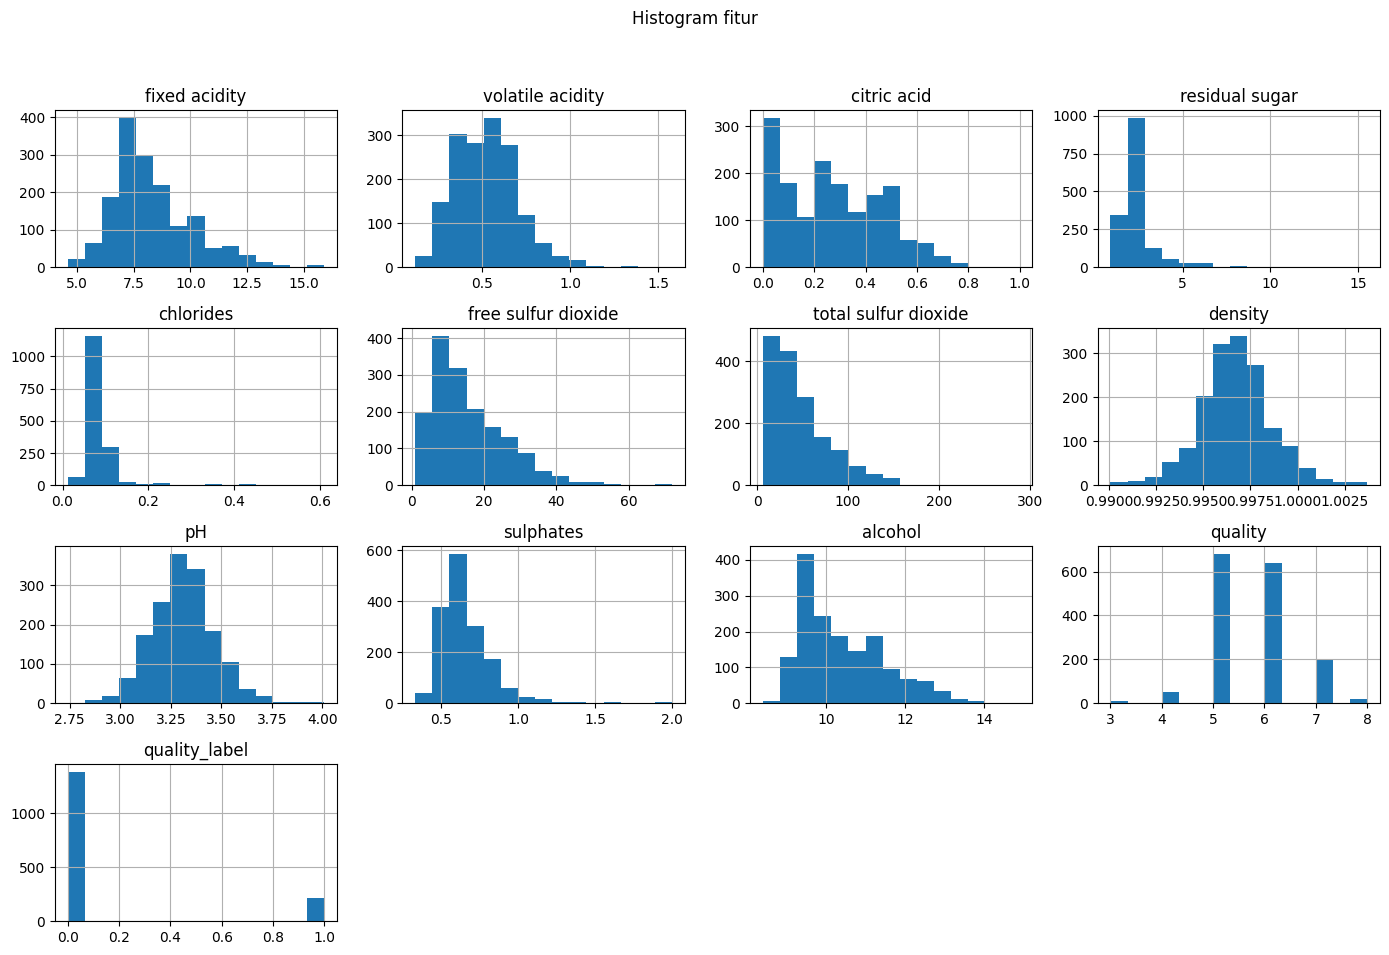

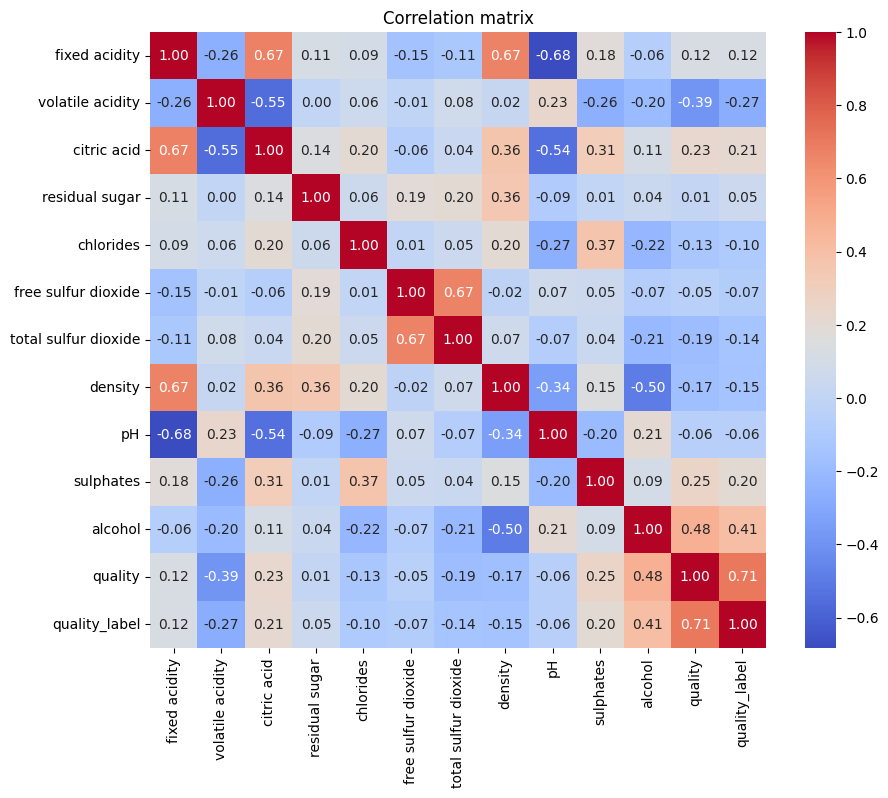

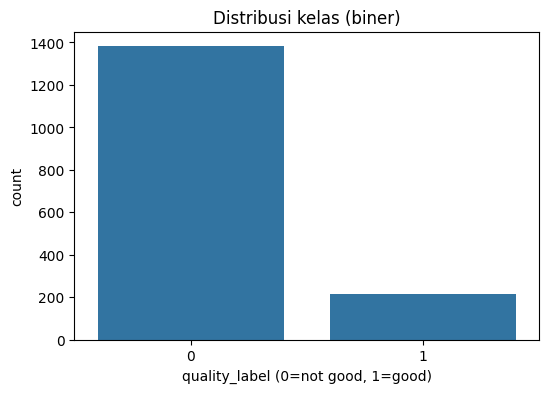

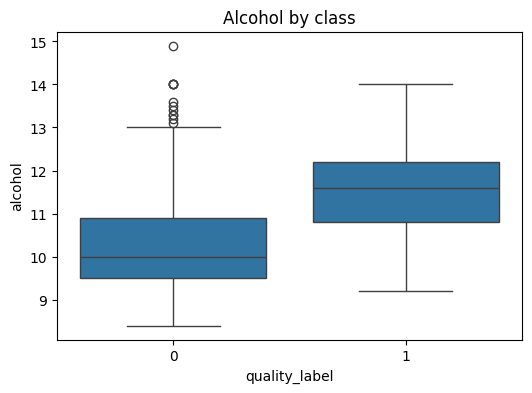

In [ ]:
# Visualisasi dataset
# histogram semua fitur
df.hist(figsize=(14,10), bins=15)
plt.suptitle("Histogram fitur")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# heatmap korelasi
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation matrix")
plt.show()

# distribusi kelas (biner)
plt.figure(figsize=(6,4))
sns.countplot(x='quality_label', data=df)
plt.title("Distribusi kelas (biner)")
plt.xlabel("quality_label (0=not good, 1=good)")
plt.show()

# boxplot contoh: alcohol per kelas
plt.figure(figsize=(6,4))
sns.boxplot(x='quality_label', y='alcohol', data=df)
plt.title("Alcohol by class")
plt.show()


In [ ]:
# Evaluasi beberaoa algoritma klasifikasi
# fitur dan target (gunakan quality_label untuk biner; pakai 'quality' jika multi-class)
X = df.drop(columns=['quality', 'quality_label'])
y = df['quality_label']

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = {
    "LogisticRegression": Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression(max_iter=500))]),
    "KNN": Pipeline([('scaler', StandardScaler()), ('clf', KNeighborsClassifier())]),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "GaussianNB": Pipeline([('scaler', StandardScaler()), ('clf', GaussianNB())]),
    "SVM": Pipeline([('scaler', StandardScaler()), ('clf', SVC(probability=True))])
}

print("=== Cross-validation (accuracy) ===")
cv_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
    cv_scores[name] = scores
    print(f"{name}: mean={scores.mean():.4f}, std={scores.std():.4f}")


=== Cross-validation (accuracy) ===
LogisticRegression: mean=0.8788, std=0.0094
KNN: mean=0.8577, std=0.0093
DecisionTree: mean=0.8428, std=0.0184
RandomForest: mean=0.8882, std=0.0167
GaussianNB: mean=0.8217, std=0.0276
SVM: mean=0.8796, std=0.0165


In [ ]:
#Membangun Model
print("\n=== Train & evaluate on test set ===")
evals = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    evals[name] = {'accuracy':acc, 'precision':prec, 'recall':rec, 'f1':f1}
    print(f"\n-- {name} --")
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1:", f1)
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, zero_division=0))



=== Train & evaluate on test set ===

-- LogisticRegression --
Accuracy: 0.89375
Precision: 0.6956521739130435
Recall: 0.37209302325581395
F1: 0.48484848484848486
Confusion matrix:
 [[270   7]
 [ 27  16]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       277
           1       0.70      0.37      0.48        43

    accuracy                           0.89       320
   macro avg       0.80      0.67      0.71       320
weighted avg       0.88      0.89      0.88       320


-- KNN --
Accuracy: 0.89375
Precision: 0.6666666666666666
Recall: 0.4186046511627907
F1: 0.5142857142857142
Confusion matrix:
 [[268   9]
 [ 25  18]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       277
           1       0.67      0.42      0.51        43

    accuracy                           0.89       320
   macro avg       0.79      0.69      0.73       320
weighted avg       0.88      0.89      0.88 

In [ ]:
# Memilih model terbaik
# pilih berdasarkan mean CV accuracy
mean_cv = {name: scores.mean() for name, scores in cv_scores.items()}
best_name = max(mean_cv, key=mean_cv.get)
print("Best by CV mean accuracy:", best_name)

# contoh: jika RandomForest paling baik, kita lakukan GridSearch sederhana
if best_name == "RandomForest":
    param_grid = {
        'n_estimators':[100,200],
        'max_depth':[None, 8, 12],
        'min_samples_split':[2,5]
    }
    grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    final_model = grid.best_estimator_
    print("Best params:", grid.best_params_, " Best CV:", grid.best_score_)
else:
    # retrain best model on training data
    final_model = models[best_name]
    final_model.fit(X_train, y_train)

# evaluasi final model
y_pred_final = final_model.predict(X_test)
print("\nFinal model test results:")
print("Accuracy:", accuracy_score(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final, zero_division=0))

# simpan model
os.makedirs("saved_model", exist_ok=True)
joblib.dump(final_model, "saved_model/best_model.joblib")
print("Saved model to saved_model/best_model.joblib")


Best by CV mean accuracy: RandomForest
Best params: {'max_depth': 12, 'min_samples_split': 2, 'n_estimators': 100}  Best CV: 0.8897303921568627

Final model test results:
Accuracy: 0.940625
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       277
           1       0.90      0.63      0.74        43

    accuracy                           0.94       320
   macro avg       0.92      0.81      0.85       320
weighted avg       0.94      0.94      0.94       320

Saved model to saved_model/best_model.joblib
